# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

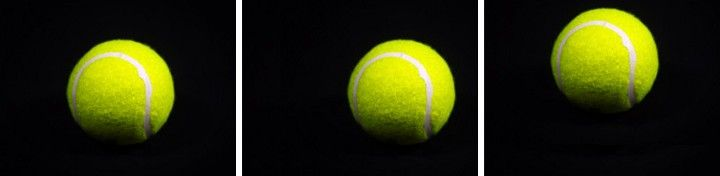



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [3]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

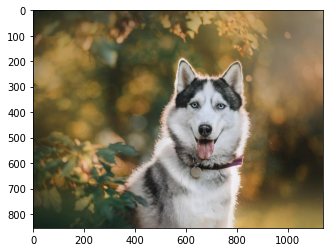

In [4]:
url = 'https://estaticos.muyinteresante.es/media/cache/1140x_thumb/uploads/images/gallery/59bbb29c5bafe878503c9872/husky-siberiano-bosque.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


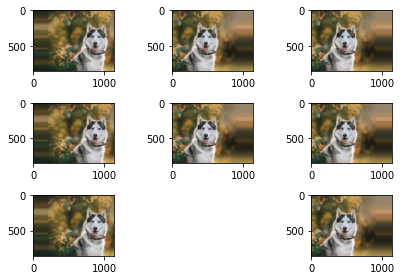

In [6]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Un giro de imagen significa invertir las filas o columnas de píxeles en el caso de un giro vertical u horizontal, respectivamente.
El aumento se especifica mediante un argumento booleano **horizontal_flip** o **vertical_flip** para la clase **ImageDataGenerator**.

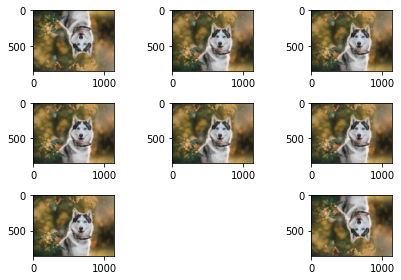

In [8]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

La cantidad de zoom se muestrea uniformemente al azar de la región de zoom para cada dimensión (ancho, alto) por separado.

Flotante o [limite inferior, limite superior]. Rango para zoom aleatorio. Si es un flotante, [limite inferior, limite superior] = [1-zoom_range, 1 + zoom_range]

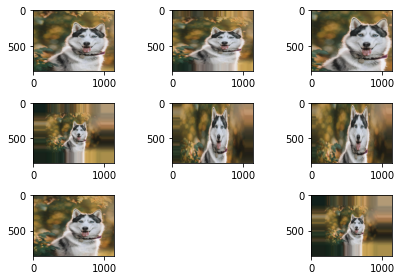

In [9]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

Se gira aleatoriamente la imagen en el sentido de las agujas del reloj un número determinado de grados de 0 a 360. Es probable que gire los píxeles fuera del marco de la imagen y deje áreas del marco sin datos de píxeles, que deban completarse.

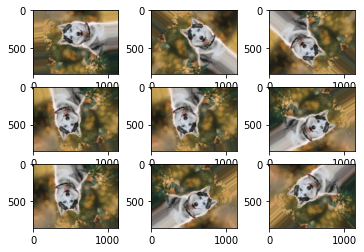

In [10]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

La combinacion de estas tecnicas nos permite aumentar la cantidad de datos del dataset a utilizar, en muchos trabajos se utiliza una aumentacion de datos para aumentar la cantidad de imagenes de entrenamiento y mejorar la precision del trabajo.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

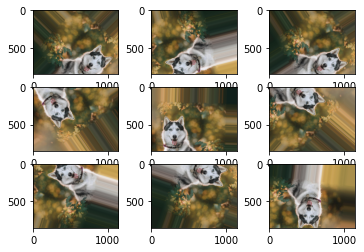

In [11]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Ahora consideramos palabras, el trabajo necesario no es tan sencillo dado la complejidad inherente del lenguaje (no podemos reemplazar cada palabra por su sinónimo e incluso si lo hacemos, corremos el riesgo de que el significado de la oración cambie completamente.
Existen algunas librerias que nos pueden ayudar a realizar esta tarea, iniciaremos analizando las siguientes:


1.   Text Attack
2.   Google Trans

**Some other information found in the Keras Website for ImageDataGenerator are the following functions:**

**Directory:** string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.

**target_size:** Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.

**color_mode:** One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

**classes:** Optional list of class subdirectories (e.g. ['dogs', 'cats']). Default: None. If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, where each subdirectory will be treated as a different class (and the order of the classes, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.

**class_mode:** One of "categorical", "binary", "sparse", "input", or None. Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels, - "input" will be images identical to input images (mainly used to work with autoencoders). - If None, no labels are returned (the generator will only yield batches of image data, which is useful to use with model.predict()). Please note that in case of class_mode None, the data still needs to reside in a subdirectory of directory for it to work correctly.

**batch_size:** Size of the batches of data (default: 32).
shuffle: Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.
seed: Optional random seed for shuffling and transformations.

**save_to_dir:** None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).

**save_prefix:** Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).

**save_format:** One of "png", "jpeg" (only relevant if save_to_dir is set). Default: "png".
follow_links: Whether to follow symlinks inside class subdirectories (default: False).

**subset:** Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.
interpolation: Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [12]:
!pip install textattack

     |████████████████████████████████| 327kB 7.6MB/s 
     |████████████████████████████████| 1.7MB 13.3MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 317kB 41.8MB/s 
     |████████████████████████████████| 686kB 41.3MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 153kB 46.5MB/s 
     |████████████████████████████████| 3.0MB 48.0MB/s 
     |████████████████████████████████| 235kB 43.7MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 1.1MB 45.5MB/s 
     |████████████████████████████████| 245kB 49.0MB/s 
     |████████████████████████████████| 778kB 47.8MB/s 
     |████████████████████████████████| 122kB 51.9MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 163kB 48.1MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 204kB 45.6MB/

In [13]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 20:40:18 INFO: Downloading default packages for language: en (English)...
2020-10-16 20:42:48 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [15]:
text = "Whatever people say I am, that´s what I´m not"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [16]:
aug = WordNetAugmenter();
aug.augment(text)

['Whatever people say one am that´s what I´m not']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [17]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:15<00:00, 30.6MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpd9e2jyli.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Whatever people says I am that´s what I´m not']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [18]:
aug = CharSwapAugmenter()
aug.augment(text)

['Whatever people sa I am that´s what I´m not']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [19]:
aug = EasyDataAugmenter()
aug.augment(text)

['Whatever people m I am that´s what I´say not',
 'Whatever people say siemens I am that´s what I´m not',
 'whatever people say I am that´s what I´m not',
 'Whatever say I am that´s what I´m not']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [20]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 972kB 8.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d332e1f2b40aa351f5105cab72be51cef39433ed1e08b0b18ec3a16cc7bbb6d1
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=73d728880485b814bfa036ac55466cc7736ae292b4ce3499d1475ddde953686c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [21]:
from googletrans import Translator
translator = Translator()

In [23]:
origin_text = "Great escape lost track of time and space"
text_trans = translator.translate(text=origin_text, dest='la').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Great escape lost track of time and space
Vestigia fugae spatium damnatis magna
The footsteps of the great flight, the space of the lost:


In [24]:
origin_text = "Great escape lost track of time and space"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Great escape lost track of time and space
時間と空間を見失った大脱走
Great escape that lost sight of time and space


In [25]:
origin_text = "Great escape lost track of time and space"
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Great escape lost track of time and space
Ukuphunyuka okuhle kulahle umkhondo wesikhathi nendawo
A good escape has lost track of time and place
